# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [4]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/content/drive/My Drive/"

else:
    # Define path del proyecto
    Ruta            = ""

Mounted at /content/drive


In [2]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [56]:
# Dataset url
url = "drive/My Drive/datasets/SyntheticData4Clustering_X.csv"

# Load the dataset
df  = pd.read_csv(url)


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [9]:
# Print the dataframe
df

,x1,x2,x3,x4,x5,x6
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334
...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975


In [16]:
# get the number of observations and variables
observations = df.count()

print("Numero de observaciones: ", observations)


Numero de observaciones:  x1    1024
x2    1024
x3    1024
x4    1024
x5    1024
x6    1024
dtype: int64


2. Drop rows with any missing values


In [18]:
# Drop rows with NaN values if existing
total_rows=len(df.axes[0]) #===> Axes of 0 is for a row
print("Numero de filas: "+str(total_rows))


# Print the new shape


Numero de filas: 1024


3. Scatterplot




<Axes: xlabel='x1', ylabel='x2'>

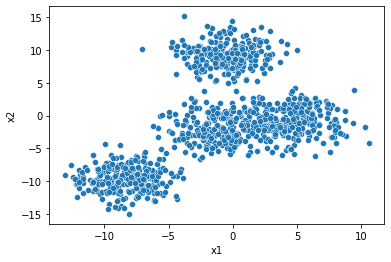

In [19]:
# Scatterplot of x1 and x2

sns.scatterplot(data=df, x="x1", y="x2")

<Axes: xlabel='x1', ylabel='x3'>

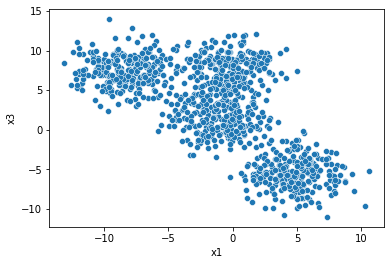

In [20]:
# Scatterplot of x1 and x3
sns.scatterplot(data=df, x="x1", y="x3")

Difficult to plot independetly all combinations, let's use pairplot

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'clors'
  cset = contour_func(
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'clors'
  cset = contour_func(
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'clors'
  cset = contour_func(
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'clors'
  cset = contour_func(
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'clors'
  cset = contour_func(
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'clors'
  cset = contour_func(
/usr/local/lib/python3.9/dist-pack

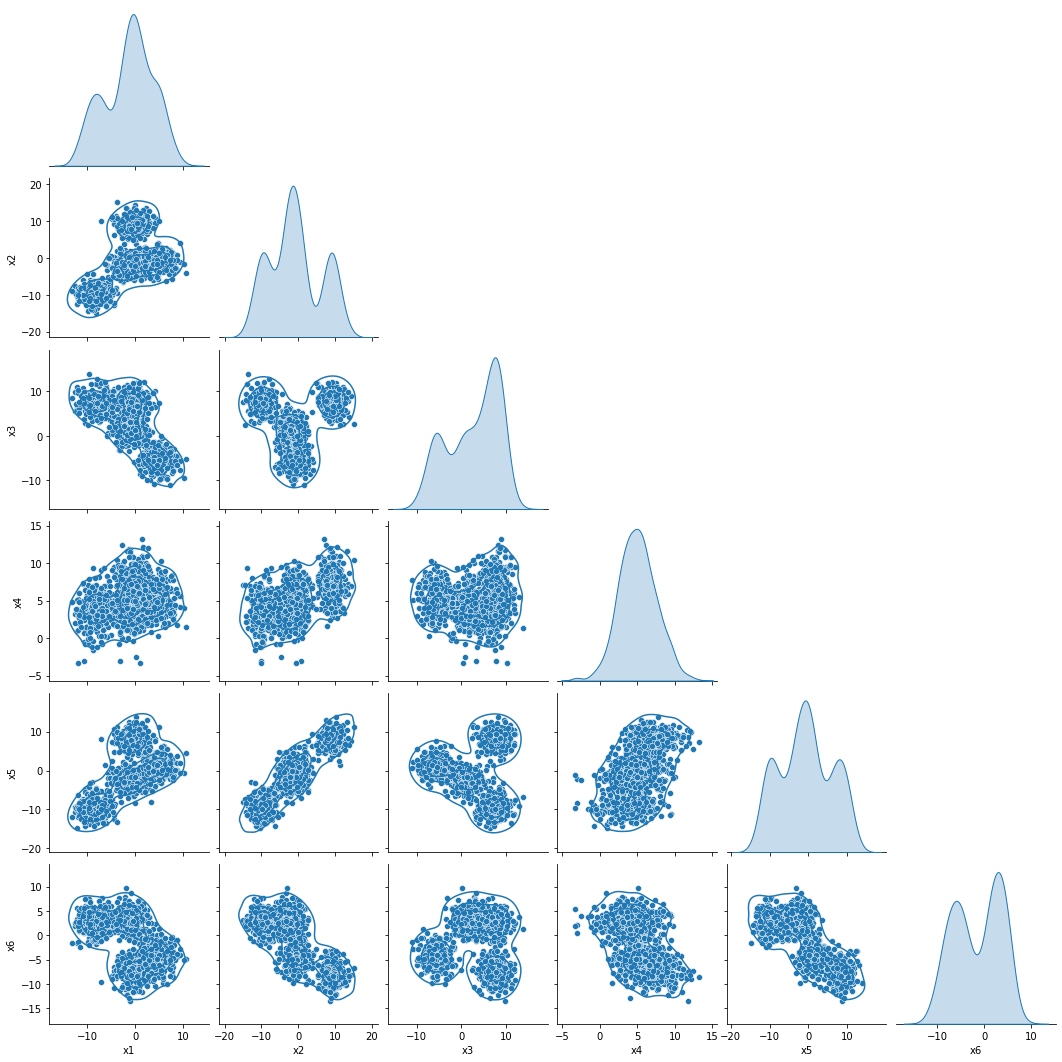

In [38]:
# Pairplot: Scatterplot of all variables

g= sns.pairplot(df, corner=True, diag_kind="kde")
g.map_lower(sns.kdeplot,levels=4,clors="2")
plt.show()

It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

In [74]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 3 # Let's assume there are 2,3,4,5...? clusters/groups

#Crear el objeto o el modelo de MachineKMeans
km = KMeans(n_clusters =K,n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)


# Print estimated cluster of each point in the dataset
yestimated

array([2, 1, 1, ..., 1, 2, 2], dtype=int32)

In [58]:
# Add a new column to the dataset with the cluster information
df2 = df.assign(yestimated=yestimated)
df2

,x1,x2,x3,x4,x5,x6,yestimated
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978,1
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122,0
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397,0
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542,0
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334,1
...,...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649,1
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336,2
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100,0
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975,1


In [40]:
# Laber of the estimated clusters

df2.yestimated.unique()


array([1, 2, 0], dtype=int32)

In [48]:
# Cluster centroides
km.cluster_centers_

array([[ 1.85043266, -1.34592151, -2.11883656,  4.5718429 , -0.79519547,
        -0.55114018],
       [-8.3650671 , -9.59550917,  7.40711607,  3.77249056, -9.44226128,
         2.67666451],
       [-0.44229417,  9.13121533,  7.61409814,  7.22984721,  8.13001382,
        -7.6264221 ]])

In [75]:
# Sum of squared error (sse) of the final model
km.inertia_


44295.1263266536

In [65]:
# The number of iterations required to converge
km.n_iter_

2

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

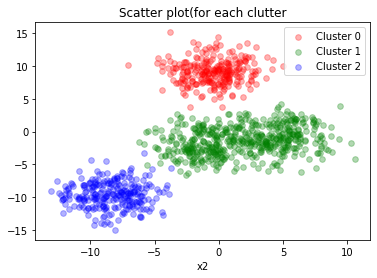

In [60]:
# Get a dataframe with the data of each clsuter

df_1 = df2[df2.yestimated==0]
df_2 = df2[df2.yestimated==1]
df_3 = df2[df2.yestimated==2]

# Scatter plot of each cluster

plt.scatter(df_1.x1, df_1.x2, label="Cluster 0", c='r',marker='o',s=32,alpha=0.3)
plt.scatter(df_2.x1, df_2.x2, label="Cluster 1", c='g',marker='o',s=32,alpha=0.3)
plt.scatter(df_3.x1, df_3.x2, label="Cluster 2", c='b',marker='o',s=32,alpha=0.3)

plt.title("Scatter plot for each clutter")
plt.xlabel('x1')
plt.xlabel('x2')
plt.legend()
plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [99]:
# Intialize a list to hold sum of squared error (sse)
sse = []
  
# Define values of k
k_rng=range(1,10)

# For each k
for k in k_rng:
  km = KMeans(n_clusters=k,n_init="auto")
  km.fit_predict(df[['x1','x2']])
  sse.append(km.inertia_)

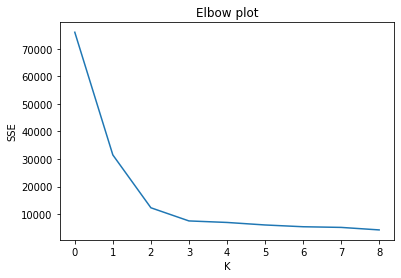

In [100]:
# Plot sse versus k
plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(sse)

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Observations?



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: 

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions

# Activity: work with the iris dataset

    
1. Do clustering with the iris flower dataset to form clusters using as features the four features

2. Do clustering with the iris flower dataset to form clusters using as features the two petal measurements: Drop out the other two features

3. Do clustering with the iris flower dataset to form clusters using as features the two sepal measurements: Drop out the other two features

4. Which one provides the better grouping? Solve this using programming skills, e.g., compute performance metrics


In [18]:
url_iris = "drive/My Drive/A01641179/datasets/iris/iris.csv"

df_iris = pd.read_csv(url_iris, header = None)
df_iris = df_iris.rename(columns={0: "x1"})
df_iris = df_iris.rename(columns={1: "x2"})
df_iris = df_iris.rename(columns={2: "x3"})
df_iris = df_iris.rename(columns={3: "x4"})
df_iris = df_iris.rename(columns={4: "x5"})
df_iris


,x1,x2,x3,x4,x5
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
observations_iris = df_iris.count()

print("Numero de observaciones: ", observations_iris)


Numero de observaciones:  x1    150
x2    150
x3    150
x4    150
x5    150
dtype: int64


In [20]:
total_rows_iris=len(df_iris.axes[0]) #===> Axes of 0 is for a row
print("Numero de filas: "+str(total_rows_iris))

Numero de filas: 150


<Axes: xlabel='x1', ylabel='x2'>

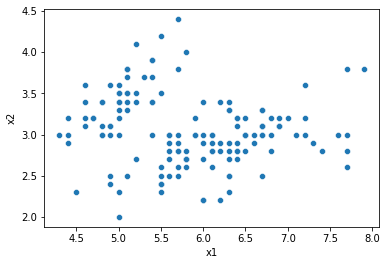

In [22]:
sns.scatterplot(data=df_iris, x="x1", y="x2")

<Axes: xlabel='x1', ylabel='x3'>

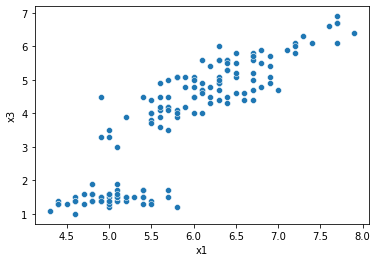

In [23]:
sns.scatterplot(data=df_iris, x="x1", y="x3")

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'clors'
  cset = contour_func(
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'clors'
  cset = contour_func(
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'clors'
  cset = contour_func(
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'clors'
  cset = contour_func(
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'clors'
  cset = contour_func(
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'clors'
  cset = contour_func(


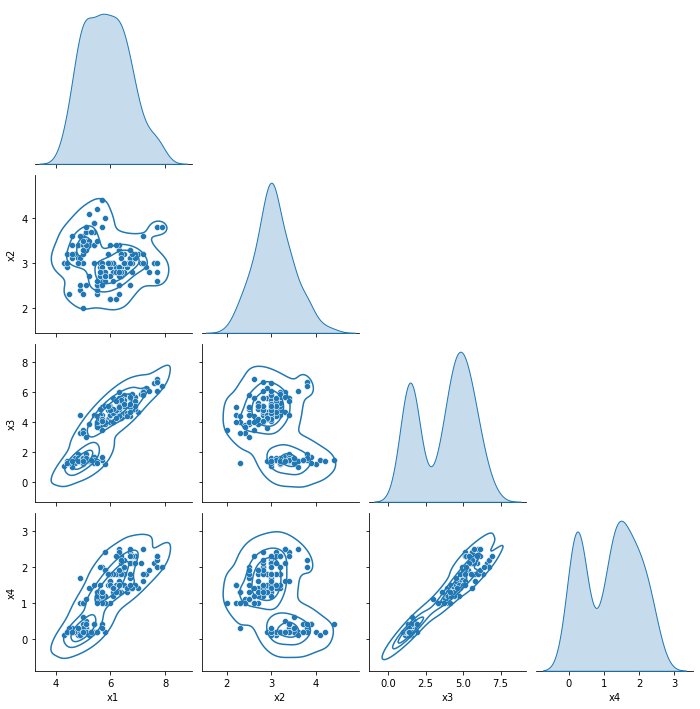

In [24]:
g= sns.pairplot(df_iris, corner=True, diag_kind="kde")
g.map_lower(sns.kdeplot,levels=4,clors="2")
plt.show()

In [32]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
K  = 4 # Let's assume there are 2,3,4,5...? clusters/groups

#Crear el objeto o el modelo de MachineKMeans
km_iris = KMeans(n_clusters =K,n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated_iris = km_iris.fit_predict(df_iris.iloc[:,0:4])


# Print estimated cluster of each point in the dataset
yestimated_iris

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0,
       3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 0, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2,
       0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0], dtype=int32)

In [34]:
df2_iris = df_iris.assign(yestimated_iris=yestimated_iris)
df2_iris

,x1,x2,x3,x4,x5,yestimated_iris
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [35]:
# Laber of the estimated clusters

df2_iris.yestimated_iris.unique()

array([1, 0, 3, 2], dtype=int32)

In [43]:
# Cluster centroides
km_iris.cluster_centers_

array([[6.2525    , 2.855     , 4.815     , 1.625     ],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143]])

In [44]:
# Sum of squared error (sse) of the final model
km_iris.inertia_

57.22847321428572

In [45]:
# The number of iterations required to converge
km_iris.n_iter_

3

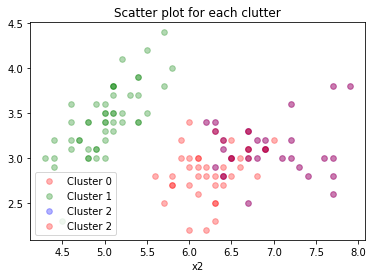

In [42]:
# Get a dataframe with the data of each clsuter

df_1_iris = df2_iris[df2_iris.yestimated_iris==0]
df_2_iris = df2_iris[df2_iris.yestimated_iris==1]
df_3_iris = df2_iris[df2_iris.yestimated_iris==2]
df_4_iris = df2_iris[df2_iris.yestimated_iris==2]
# Scatter plot of each cluster

plt.scatter(df_1_iris.x1, df_1_iris.x2, label="Cluster 0", c='r',marker='o',s=32,alpha=0.3)
plt.scatter(df_2_iris.x1, df_2_iris.x2, label="Cluster 1", c='g',marker='o',s=32,alpha=0.3)
plt.scatter(df_3_iris.x1, df_3_iris.x2, label="Cluster 2", c='b',marker='o',s=32,alpha=0.3)
plt.scatter(df_4_iris.x1, df_4_iris.x2, label="Cluster 2", c='r',marker='o',s=32,alpha=0.3)

plt.title("Scatter plot for each clutter")
plt.xlabel('x1')
plt.xlabel('x2')
plt.legend()
plt.show()

In [46]:
# Intialize a list to hold sum of squared error (sse)
sse = []
  
# Define values of k
k_rng=range(1,10)

# For each k
for k in k_rng:
  km_iris = KMeans(n_clusters=k,n_init="auto")
  km_iris.fit_predict(df_iris[['x1','x2']])
  sse.append(km_iris.inertia_)

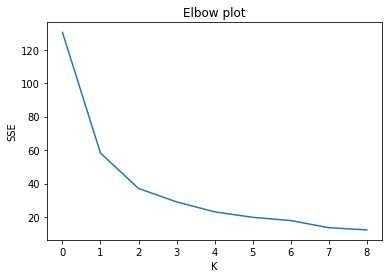

In [47]:
# Plot sse versus k
plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(sse)

In [48]:
# Intialize a list to hold sum of squared error (sse)
sse = []
  
# Define values of k
k_rng=range(1,10)

# For each k
for k in k_rng:
  km_iris = KMeans(n_clusters=k,n_init="auto")
  km_iris.fit_predict(df_iris[['x3','x4']])
  sse.append(km_iris.inertia_)

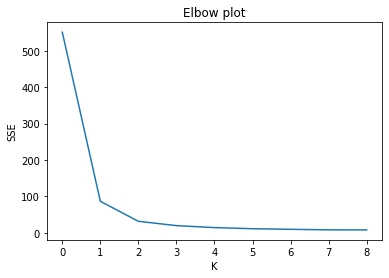

In [49]:
# Plot sse versus k
plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(sse)